### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [2]:
df = pd.read_csv(r'data/placement.csv')

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [4]:
df.shape

(1000, 3)

In [5]:
df.columns

Index(['cgpa', 'placement_exam_marks', 'placed'], dtype='object')

In [6]:
df['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

### Distribution of cgpa and placement_exam_marks cols

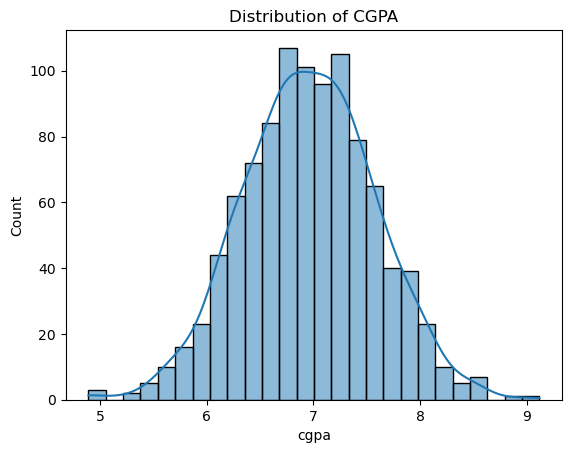

In [7]:
sns.histplot(data=df, x='cgpa', kde=True);
plt.title('Distribution of CGPA');

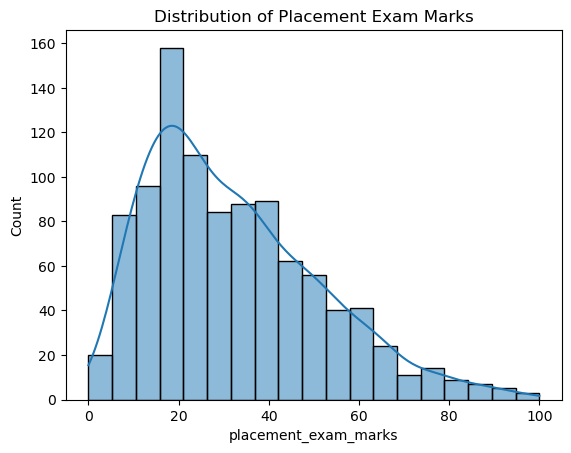

In [8]:
sns.histplot(data=df, x='placement_exam_marks', kde=True);
plt.title('Distribution of Placement Exam Marks');

* Distribution of `cgpa` is almost normally distribution.
* Distribution of `placement_exam_marks` is right-skewed.
* Can only apply Z-Score Technique only on `cgpa` column.

In [9]:
df.skew()

cgpa                   -0.014530
placement_exam_marks    0.835642
placed                  0.044077
dtype: float64

### Statistics of cpga column

In [10]:
print("Mean value of cgpa: ",df['cgpa'].mean())
print("Std value of cgpa: ",df['cgpa'].std())
print("Min value of cgpa: ",df['cgpa'].min())
print("Max value of cgpa: ",df['cgpa'].max())

Mean value of cgpa:  6.96124
Std value of cgpa:  0.6158978751323894
Min value of cgpa:  4.89
Max value of cgpa:  9.12


### Upper (mean + 3 * sd) & Lower (mean - 3 * sd) Boundaries

In [11]:
print("Upper Boundary: ", df['cgpa'].mean() + 3 * df['cgpa'].std())
print("Lower Boundary: ", df['cgpa'].mean() - 3 * df['cgpa'].std())

Upper Boundary:  8.808933625397168
Lower Boundary:  5.113546374602832


### Finding the outliers

In [12]:
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)] 

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


### Trimming - Remove the outliers

In [13]:
trimmed_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]

In [14]:
trimmed_df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [15]:
trimmed_df.shape

(995, 3)

* Notice that the five rows which were outliers were removed.

### Using Z-Score to remove the outliers

In [16]:
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean()) / df['cgpa'].std()

In [17]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [18]:
zscore_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]

In [19]:
zscore_df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [20]:
zscore_df.shape

(995, 4)

* This is also same as Trimming.

### Capping

In [19]:
upper_limit = df['cgpa'].mean() + 3 * df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3 * df['cgpa'].std()

In [20]:
df['cgpa'] = np.where(
    df['cgpa'] > upper_limit, upper_limit, # If val > upper_limit -> replace it with upper_limit
    np.where(
        df['cgpa'] < lower_limit, lower_limit, # If val < lower_limit -> replace it with lower_limit
        df['cgpa'] # Else do not do anything
    )
)

In [21]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [22]:
df.shape

(1000, 4)

* Notice there's no change in the shape of the dataframe. Only the values which are greater than upper_limit and lesser than lower_limit got replace with upper_limit and lower_limit respectively.

In [23]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

### Distribution of cgpa column after capping

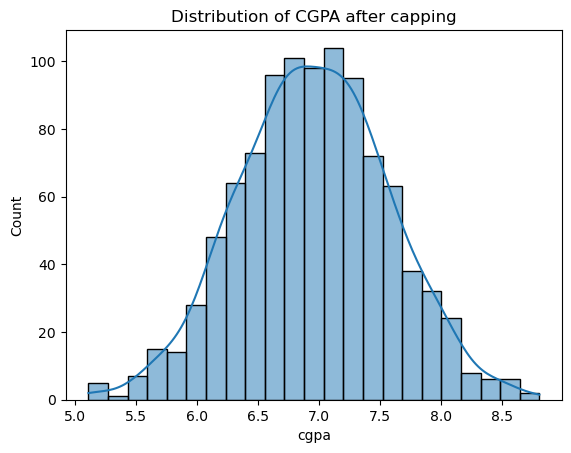

In [24]:
sns.histplot(data=df, x='cgpa', kde=True);
plt.title('Distribution of CGPA after capping');

* There is no change in the distribution of the data.